## Step 1. 讀入檔案

In [1]:
# 下載 Gossiping 版 2005 至 2020 年，每五年的詞向量
!gdown --id "1gEL4v3wGgvqJnpWspISZvLeIL3GQZLB1" -O "Gossiping_2005.model" # 2005 年 Gossiping 板
!gdown --id "1yB9WPVDJVmmLLxbEHZroZP_cYMP0JUpC" -O "Gossiping_2010.model" # 2010 年 Gossiping 板
!gdown --id "1Vh8meq6hdte02nQ2-djclgpEKxFUC0YU" -O "Gossiping_2015.model" # 2015 年 Gossiping 板
!gdown --id "1EiDgWcnDDSOy1bu_aRjbBk4JGIENNoGk" -O "Gossiping_2020.model" # 2020 年 Gossiping 板

Downloading...
From: https://drive.google.com/uc?id=1gEL4v3wGgvqJnpWspISZvLeIL3GQZLB1
To: /content/Gossiping_2005.model
31.8MB [00:00, 120MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1yB9WPVDJVmmLLxbEHZroZP_cYMP0JUpC
To: /content/Gossiping_2010.model
27.7MB [00:00, 105MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Vh8meq6hdte02nQ2-djclgpEKxFUC0YU
To: /content/Gossiping_2015.model
120MB [00:00, 145MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EiDgWcnDDSOy1bu_aRjbBk4JGIENNoGk
To: /content/Gossiping_2020.model
74.2MB [00:00, 96.8MB/s]


In [2]:
# 下載 WomenTalk 版 2005 至 2020 年，每五年的詞向量
!gdown --id "18rhI6VBnBXBji0YRplcL9bF31K2gFH9R" -O "WomenTalk_2005.model" # 2005 年 WomenTalk 板
!gdown --id "19XZ-SeZNUu515TZS3lW9kHASk_P6CYQJ" -O "WomenTalk_2010.model" # 2010 年 WomenTalk 板
!gdown --id "1CQtZ_5Tu8ML24es2vYfQcCoGcCTadzCp" -O "WomenTalk_2015.model" # 2015 年 WomenTalk 板
!gdown --id "1PqqW_5TyNKDU3WPubypIBED2GnlfFGTE" -O "WomenTalk_2020.model" # 2020 年 WomenTalk 板

Downloading...
From: https://drive.google.com/uc?id=18rhI6VBnBXBji0YRplcL9bF31K2gFH9R
To: /content/WomenTalk_2005.model
15.0MB [00:00, 69.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=19XZ-SeZNUu515TZS3lW9kHASk_P6CYQJ
To: /content/WomenTalk_2010.model
17.0MB [00:00, 77.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CQtZ_5Tu8ML24es2vYfQcCoGcCTadzCp
To: /content/WomenTalk_2015.model
31.0MB [00:00, 97.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PqqW_5TyNKDU3WPubypIBED2GnlfFGTE
To: /content/WomenTalk_2020.model
57.7MB [00:00, 139MB/s]


## Step 2. 選定 PPT 的版及年份

In [3]:
board_lst = ['Gossiping', 'WomenTalk']
year_lst = ['2005', '2010', '2015', '2020']

## Step 3. 歷時詞向量（、鄰近詞）

In [4]:
import gensim # 讀入詞向量

In [5]:
# 建立一個 class 來存放與詞向量有關的資料
class Embedding:
    def __init__(self, board, year_lst):
        self.board = board # 選定 PTT 的版，存成 string
        self.year_lst = year_lst # 選定各年份，存成 list
        
        self.path_lst = [f'{board}_{year}.model' for year in self.year_lst] # 該版各年份的詞向量檔案路徑
        self.model_lst = [gensim.models.Word2Vec.load(path) for path in self.path_lst] # 依詞向量檔案路徑，讀入檔案

In [6]:
# TO-DO
# 建立 Gossiping 版，2005 及 2015 的詞向量 class
embed_2005_2015 = Embedding('Gossiping', ['2005', '2015'])

In [7]:
# TO-DO
# 看 embed_2005_2015 的 model_lst
embed_2005_2015.model_lst

In [8]:
# TO-DO
# 找出 model_lst[0] 中，'台灣' 的鄰近詞
embed_2005 = embed_2005_2015.model_lst[0]
embed_2005.wv.most_similar('台灣')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('中國', 0.8369995355606079),
 ('美國', 0.7618862390518188),
 ('日本', 0.7539179921150208),
 ('發展', 0.7530442476272583),
 ('迪士尼', 0.7488158345222473),
 ('核武', 0.7449069023132324),
 ('大陸', 0.7437757849693298),
 ('企業', 0.7364033460617065),
 ('國際', 0.7337528467178345),
 ('台', 0.7331074476242065)]

In [9]:
# TO-DO
# 找出 model_lst[0] 中，'台灣' 的前35個鄰近詞
embed_2005.wv.most_similar('台灣', topn=35)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('中國', 0.8369995355606079),
 ('美國', 0.7618862390518188),
 ('日本', 0.7539179921150208),
 ('發展', 0.7530442476272583),
 ('迪士尼', 0.7488158345222473),
 ('核武', 0.7449069023132324),
 ('大陸', 0.7437757849693298),
 ('企業', 0.7364033460617065),
 ('國際', 0.7337528467178345),
 ('台', 0.7331074476242065),
 ('媒體', 0.731304407119751),
 ('故宮', 0.7308146357536316),
 ('市場', 0.7265194058418274),
 ('宣傳', 0.7256549000740051),
 ('研發', 0.7203248739242554),
 ('文化', 0.7197510004043579),
 ('香港', 0.7119626402854919),
 ('或是', 0.7114166617393494),
 ('法律', 0.7088945508003235),
 ('方面', 0.7087129354476929),
 ('銷售', 0.7086478471755981),
 ('人民', 0.7082539200782776),
 ('建設', 0.7081565260887146),
 ('地方', 0.7068655490875244),
 ('機場', 0.7057923078536987),
 ('經濟', 0.7052212953567505),
 ('統治', 0.7048121690750122),
 ('外國', 0.7042009830474854),
 ('韓國', 0.7023971676826477),
 ('銀行', 0.6996443271636963),
 ('人氣', 0.6982002258300781),
 ('對岸', 0.6975715160369873),
 ('文物', 0.6973861455917358),
 ('價值', 0.6969238519668579),
 ('轟動', 0.69653

In [10]:
# TO-DO
# 找出 model_lst[0] 中，'台灣' 的詞向量
embed_2005['台灣']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 8.07284042e-02, -1.51521474e-01,  2.04981357e-01,  7.02845901e-02,
        1.51984051e-01, -1.63245201e-01,  5.30136488e-02,  1.59432009e-01,
       -2.24587411e-01,  1.71152994e-01, -1.12564787e-01,  4.48360145e-02,
       -2.55632903e-02,  2.31184941e-02, -2.63688043e-02, -6.77243173e-02,
        3.68595235e-02, -2.79573351e-02,  1.26887467e-02, -1.29732519e-01,
       -3.31735685e-02,  4.49458629e-01,  1.79981306e-01, -2.03770511e-02,
       -7.71418139e-02, -2.83462822e-01, -4.02883515e-02, -9.84140113e-02,
        1.36178210e-01,  4.84828427e-02, -3.51133376e-01, -9.71724018e-02,
       -3.19192082e-01,  2.49882136e-02,  1.53279630e-02, -1.64181739e-01,
       -2.32220694e-01,  7.95829073e-02, -7.27088079e-02,  1.84246913e-01,
       -1.06955813e-02, -2.21261308e-01, -4.22988348e-02, -2.29381733e-02,
        9.55512449e-02, -1.48494735e-01, -2.86431611e-01,  2.87852854e-01,
       -4.09706458e-02,  1.90187067e-01, -7.25366026e-02, -4.36030813e-02,
        9.12694559e-02,  

## Step 4. 視覺化

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
%matplotlib inline

In [12]:
# 下載中文字體
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2020-12-07 14:42:09--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.124.113, 74.125.124.101, 74.125.124.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.124.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kdrh278h9a6rf3g5r4lln9j3qjoaabvf/1607352075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2020-12-07 14:42:11--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kdrh278h9a6rf3g5r4lln9j3qjoaabvf/1607352075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125

In [13]:
# 中文字體設定
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
matplotlib.rc('font', family = 'Taipei Sans TC Beta')

# 視覺化解析度設定
plt.rcParams['figure.dpi'] = 300

In [14]:
# source: https://github.com/sismetanin/word2vec-tsne
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, n1):    
    plt.figure(figsize=(9, 9)) # 設定空白畫布

    colors = cm.Accent(np.linspace(0, 1, len(labels))) # 依 labels 數量設定不同的顏色
    # source: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    arrow_lst = []
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        arrow_lst.append((x[0], y[0])) # 第 0 個點是關鍵詞本身，抓出此點的 x, y，存入 arrow_lst 中
        
        # 畫點
        plt.scatter(x[:1], y[:1], c=color, alpha=1, label=label)
        for i, word in enumerate(words):
            # 關鍵詞本身
            if i == 0:
                a = 1 # 透明度
                size = 28 # 字體大小
            # 將近鄰詞分層，調整透明度與字體大小
            elif i >= 1 and i <= n1:
                a = 0.85
                size = 16
            else:
                a = 0.35
                size = 16

            # 標詞
            plt.annotate(word, alpha=a, xy=(x[i], y[i]), xytext=(1, 1),
                         textcoords='offset points', ha='right', va='bottom', size=size, c=color)
    
    for c, i in zip(colors, range(len(arrow_lst))):
        try:
            # 劃上箭頭方向
            plt.annotate('', xy=(arrow_lst[i+1][0], arrow_lst[i+1][1]), xytext=(arrow_lst[i][0], arrow_lst[i][1]),
                         arrowprops=dict(facecolor=c, edgecolor=c, width=5, shrink=0.01, alpha=0.5))
            # source: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html
        except:
            pass
        
    plt.legend(loc=4)
    plt.grid(True)
    plt.axis('off')
    plt.show()

In [15]:
class PlotTemporalData(Embedding): # 從 Embedding 這個 class 繼續擴增 function
    def __init__(self, board, year_lst):
        super().__init__(board, year_lst)
        # self.vocab_lst = [model.wv.vocab for model in self.model_lst] # 每個詞向量的 vocabulary

    # 抓出詞向量中的點   
    def create_datapoints(self, keyword, n1=10, n2=15): 
        error_log = {} # 紀錄錯誤訊息
        
        labels = [] # 詞_年份
        
        word_clusters = [] # 詞
        embedding_clusters = [] # 向量

        # 第一層 for loop: 各年份
        for year, model in zip(self.year_lst, self.model_lst): # 將 self.year_lst 和 self.model_lst 一一對應
            
            label = f'{keyword}({year})'
            
            try: # 若是有任何錯誤（Exception as e），以 try-except 紀錄錯誤訊息（e），並存至 error_log 這個 dictionary
                # 關鍵詞
                words = [label]
                embeddings = [model[keyword]]
                
                # 第二層 for loop: 某年份的鄰近詞
                # 鄰近詞（前 n1+n2 個鄰近詞）
                for similar_word, _ in model.wv.most_similar(keyword, topn=n1+n2):
                    words.append(similar_word)
                    embeddings.append(model[similar_word])
                embedding_clusters.append(embeddings)
                word_clusters.append(words)
                
                labels.append(label)
            except Exception as e:
                error_log[label] = e
                
        print(error_log)
        self.error_log = error_log
        
        self.keyword = keyword
        self.labels = labels
        
        self.n1 = n1
        self.n2 = n2
        
        self.embedding_clusters = embedding_clusters
        self.word_clusters = word_clusters
        
    # 將點經過 t-SNE 處理
    def tsne(self):
        embedding_clusters = np.array(self.embedding_clusters)
        n, m, k = embedding_clusters.shape
        tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
        embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
        
        self.embeddings_en_2d = embeddings_en_2d
    
    # 將處理後的點視覺化
    def tsne_plot(self): 
        tsne_plot_similar_words(self.labels, self.embeddings_en_2d, self.word_clusters, self.n1)

## Step 5. 選定想觀察的字詞

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


{}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

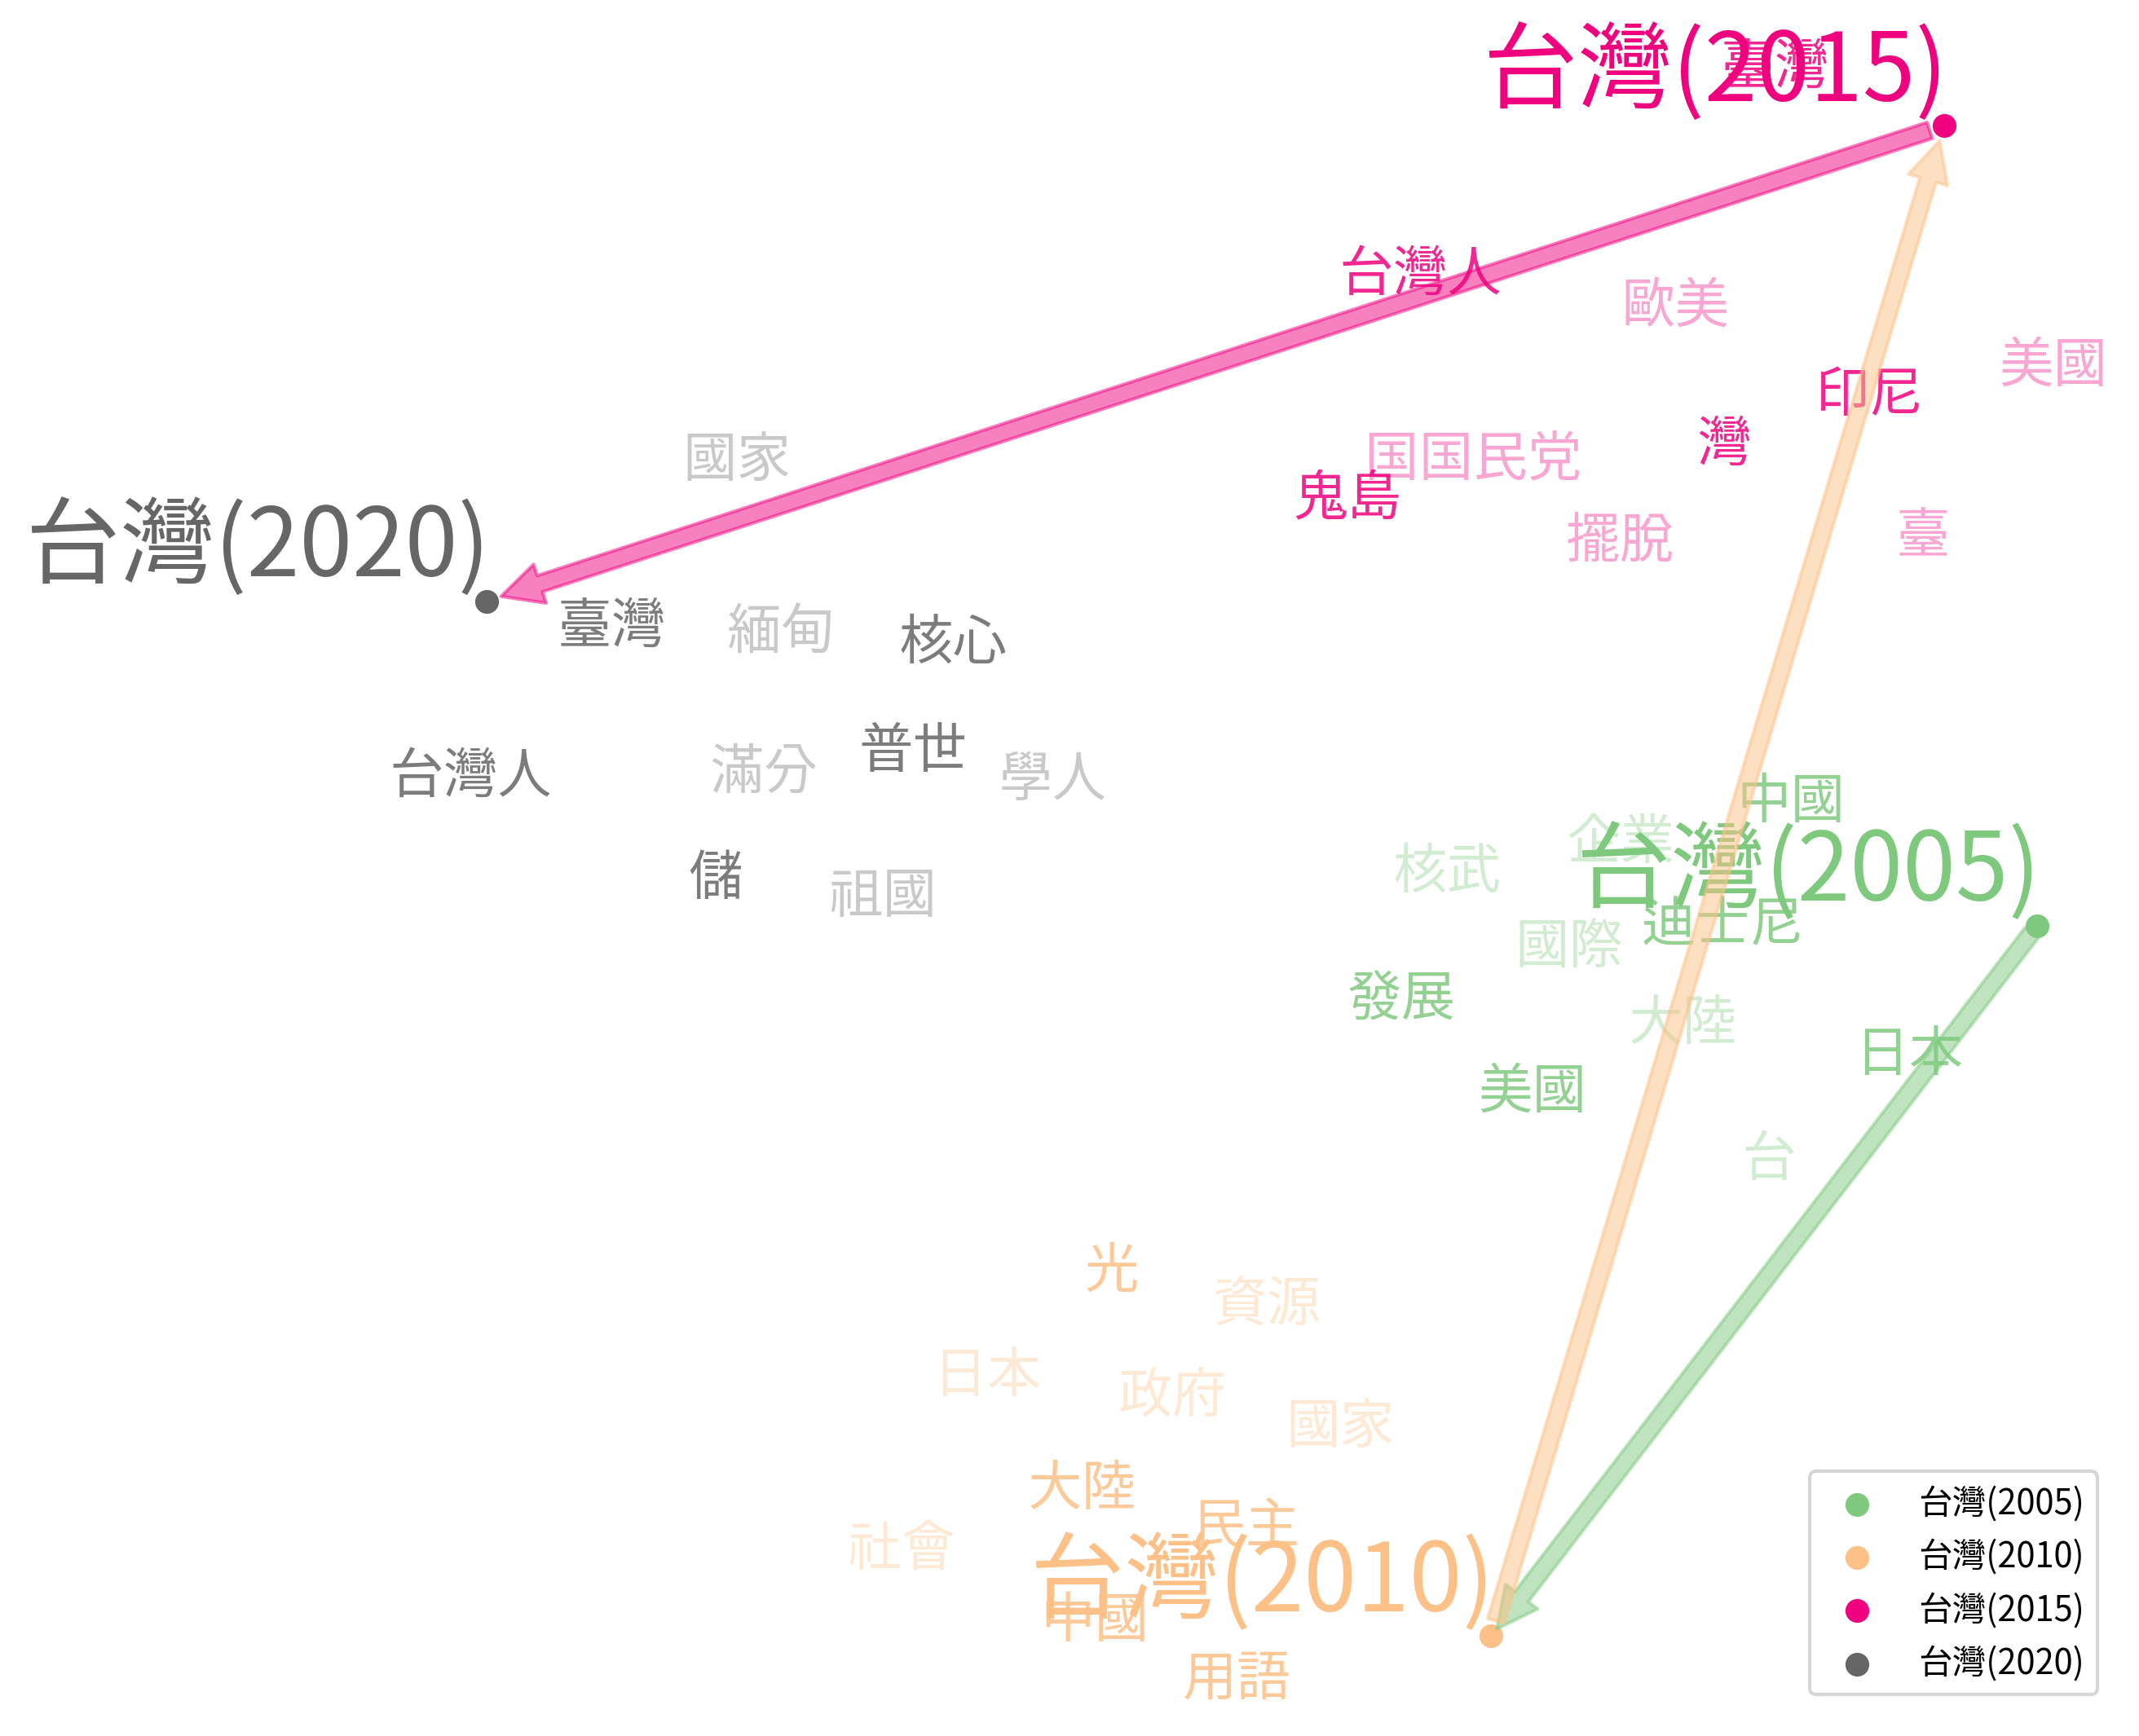

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


{}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

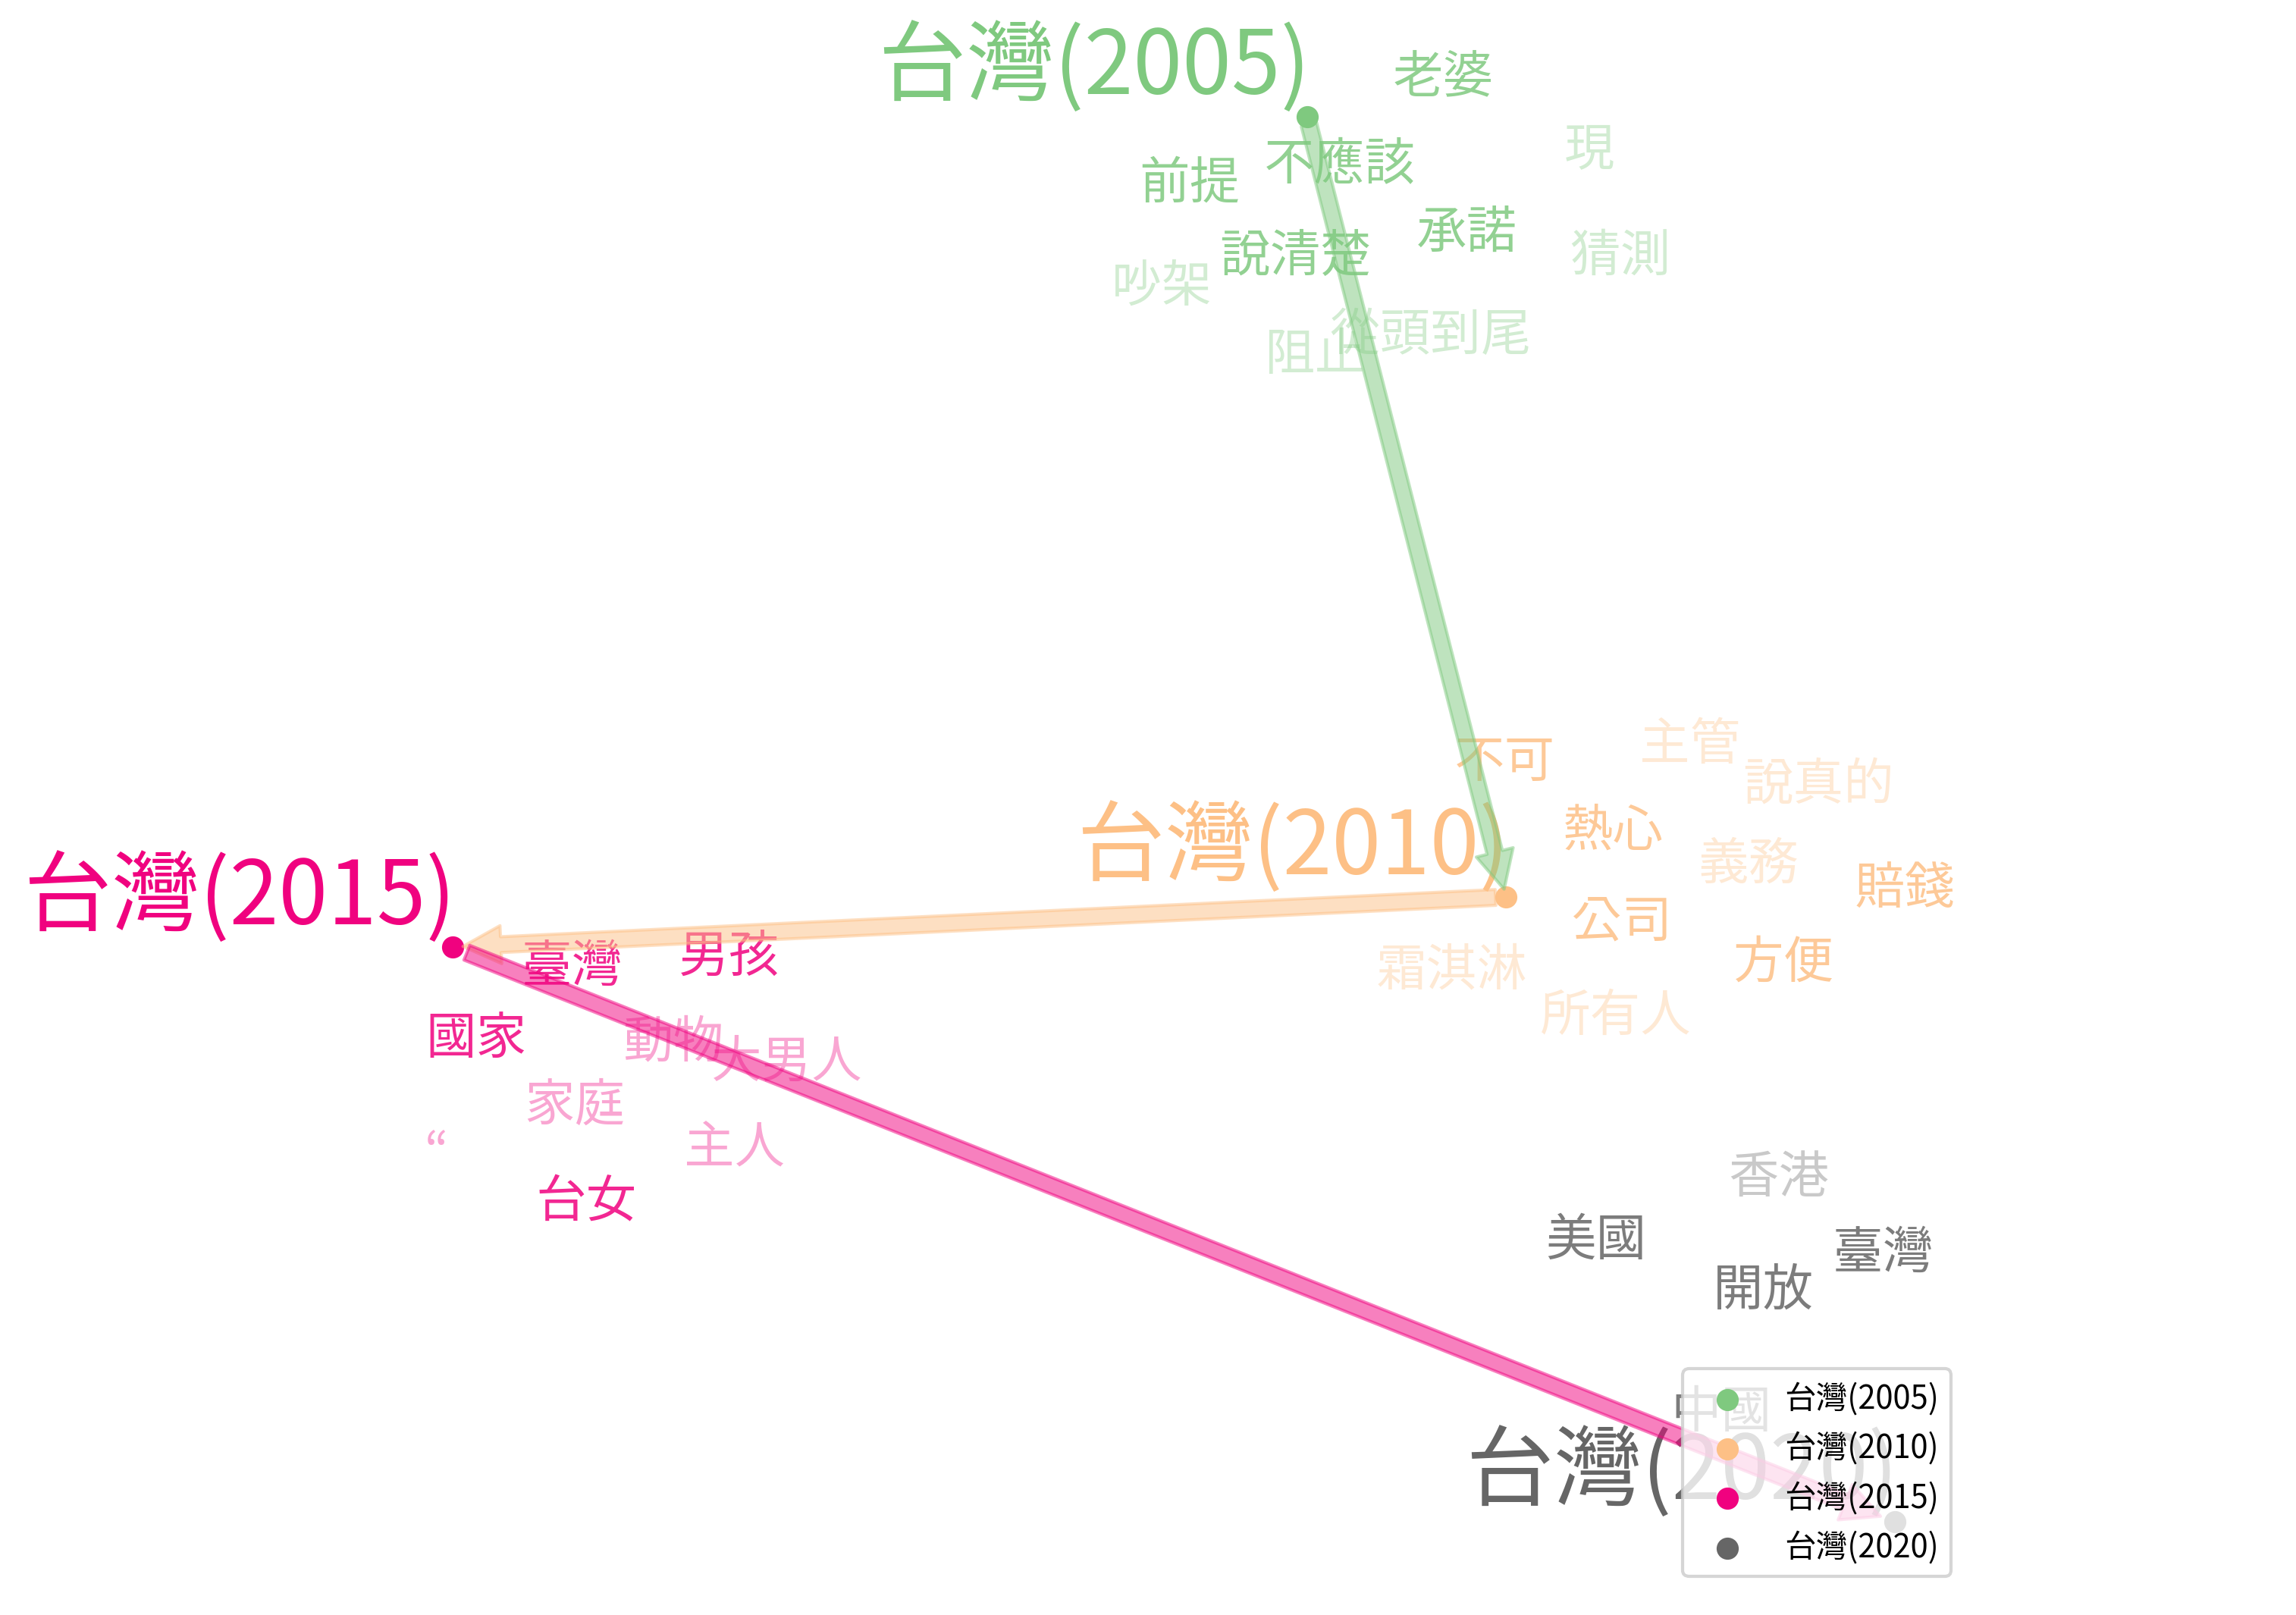

In [16]:
keyword = '台灣'
for board in board_lst:
    data = PlotTemporalData(board, year_lst)
    data.create_datapoints(keyword, n1=5, n2=5)
    #data.create_datapoints(keyword)
    data.tsne()
    data.tsne_plot()